In [1]:
## this cell is hidden in sphinx (see the cell metadata)
import expectexception

# `pycf3` tutorial

## Introduction

This tutorial is a guide of how you can use the Cosmicflows-3 Distance-Velocity Calculator client for Python.

## Fundamentals

- `pyc3f` present an [OO](https://en.wikipedia.org/wiki/Object-oriented_programming) API to acces the same capabilities of http://edd.ifa.hawaii.edu/CF3calculator/ .
- Please be gentle with the server.
- Sleep at leas half a second between requests. 

## Looking the original project

The original calculator is a web page with 4 main parts

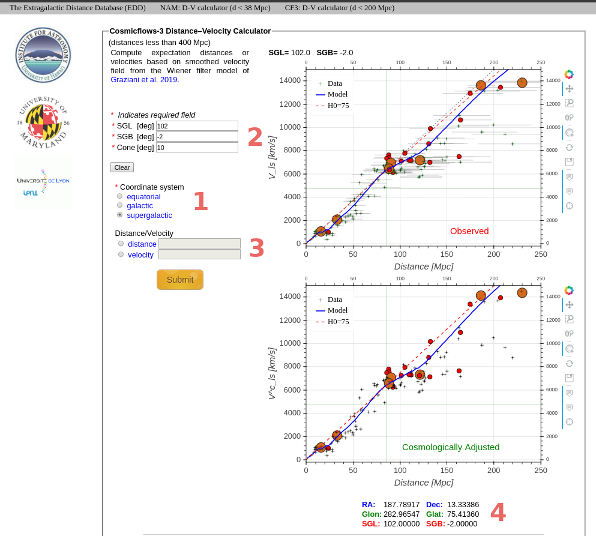

1. Select the coordinate system.
2. Provide the location of seach
3. Distance/Velocity selector (optional)
4. The entire result is on the left side

So lets analize this 3 parts in pycf3

The first thing you need to do is import the project

In [2]:
import pycf3


All data exposed by pycf3 belongs to the project

Cosmicflows-3 Distance-Velocity Calculator
(http://edd.ifa.hawaii.edu/CF3calculator/)
Copyright (C) Cosmicflows Team
The Extragalactic Distance Database (EDD)

For citation check:
    https://github.com/quatrope/pycf3/blob/master/README.rst




Then you need to create a client to interact with the server. 

In [3]:
cf3 = pycf3.CF3()
cf3

CF3(url='http://edd.ifa.hawaii.edu/CF3calculator/getData.php', cache=<diskcache.core.Cache object at 0x7f06780bef98>)

Then the three coordinates systems are provided in 3 diferent method with all the default values already present:

### Equatorial

```python
cf3.equatorial_search(ra=187.78917, dec=13.33386, cone=10.0, distance=None, velocity=None)
```

### Galactic

```python
cf3.galactic_search(glon=282.96547, glat=75.41360, cone=10.0, distance=None, velocity=None)
```

### Super Galactic

```python
cf3.supergalactic_search(sgl=102.0, sgb=-2.0, cone=10.0, distance=None, velocity=None)
```

Let's use the default `supergalactic` coordinates

In [4]:
result = cf3.supergalactic_search()
result

Result(coordinate=<CoordinateSystem.supergalactic: 'supergalactic'>, alpha=102.0, delta=-2.0, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96547, glat=75.4136, sgl=102.0, sgb=-2.0))

As you can see a result object is returned with all the information of the search and with the table present in the figure (see `#4` in the figure)

In [5]:
result.search_at_

SearchAt(ra=187.78917, dec=13.33386, glon=282.96547, glat=75.4136, sgl=102.0, sgb=-2.0)

If the user provide the **distance** parameter, the observed and the Cosmologically adjusted velocity, apears as a table:

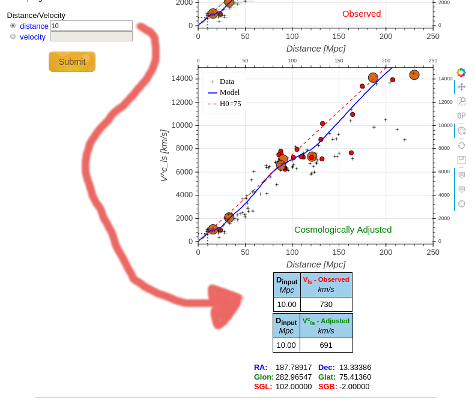

To access this data, first you need to provide the `distance` parameter to any of the 3 `search` methods

In [6]:
result = cf3.supergalactic_search(distance=10)
result

Result(coordinate=<CoordinateSystem.supergalactic: 'supergalactic'>, alpha=102.0, delta=-2.0, cone=10.0, distance=10, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96547, glat=75.4136, sgl=102.0, sgb=-2.0))

Then the values are available at:

In [7]:
result.Vls_Observed_

730.0

In [8]:
result.Vcls_Adjusted_

691.0

## PyCF3 Cache system

By default any `pycf3.CF3` instance is created with a cache that prevent to send two times the same request to the server. For example: lets make two times the same request with time measurement

In [9]:
cf3 = pycf3.CF3()

In [10]:
## this cell is hidden in sphinx (see the cell metadata)
cf3.cache.clear()

2

In [11]:
%%time
cf3.equatorial_search()

CPU times: user 15.9 ms, sys: 5.2 ms, total: 21.1 ms
Wall time: 13.7 s


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.33386, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96545, glat=75.4136, sgl=102.0, sgb=-2.0))

In [12]:
%%time
cf3.equatorial_search()

CPU times: user 1.11 ms, sys: 3.41 ms, total: 4.52 ms
Wall time: 5.42 ms


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.33386, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96545, glat=75.4136, sgl=102.0, sgb=-2.0))

As you can se the first time the total time is **17 seconds** and de the second time is only **6.56 ms**. This is because the project store te result on the local hardrive to avoid repeat the requests (by default a folfer called `pycf3_data`, is created in the user home)

But if we change the request by asking for another declination, this gonna be slow again:

In [13]:
%%time
cf3.equatorial_search(dec=13.5)

CPU times: user 20.5 ms, sys: 698 µs, total: 21.2 ms
Wall time: 14.4 s


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.5, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.5, glon=282.7572, glat=75.57134, sgl=101.84074, sgb=-1.95236))

And now this is fast again

In [14]:
%%time
cf3.equatorial_search(dec=13.5)

CPU times: user 4.18 ms, sys: 0 ns, total: 4.18 ms
Wall time: 4.77 ms


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.5, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.5, glon=282.7572, glat=75.57134, sgl=101.84074, sgb=-1.95236))

Also is useful to only allow data not "too old". In these cases, you can set how many second your local data will be available by adding the parameter `cache_expire` when you create the *CF3* client.

In [15]:
cf3 = pycf3.CF3(cache_expire=2)

At this point the new cf3 instance shares the same default-cache of the previous one. So if we here execute any of the previous request this gonna be fast

In [16]:
%%time
cf3.equatorial_search()

CPU times: user 4.3 ms, sys: 0 ns, total: 4.3 ms
Wall time: 6.73 ms


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.33386, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96545, glat=75.4136, sgl=102.0, sgb=-2.0))

Yo can remove the entire "cached" data by calling the command

In [17]:
cf3.cache.clear()

2

Now we can send the same original request and this gonna be available for 2 seconds before a new request was needed.

In [18]:
%%time
cf3.equatorial_search()

import time
time.sleep(3)  # lets sleep 3 seconds

CPU times: user 11.3 ms, sys: 10.1 ms, total: 21.4 ms
Wall time: 16.8 s


because we wait to loong the nest seach will be slow again

In [19]:
%%time
cf3.equatorial_search()

CPU times: user 9.72 ms, sys: 8.3 ms, total: 18 ms
Wall time: 16.7 s


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.33386, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96545, glat=75.4136, sgl=102.0, sgb=-2.0))

But if we don't wait the request was fast

In [20]:
%%time
cf3.equatorial_search()

CPU times: user 9.28 ms, sys: 0 ns, total: 9.28 ms
Wall time: 8.54 ms


Result(coordinate=<CoordinateSystem.equatorial: 'equatorial'>, alpha=187.78917, delta=13.33386, cone=10.0, distance=None, velocity=None, search_at_=SearchAt(ra=187.78917, dec=13.33386, glon=282.96545, glat=75.4136, sgl=102.0, sgb=-2.0))

### Changing the cache backend

The entire cache backend of pycf3 was created with **DiskCache** (http://www.grantjenks.com/docs/diskcache/)

You can change your cache location (to store differen datasets for example) by providing another `diskcache.Cache` or `diskcache.FanoutCache` instance.

```python

import diskcache as dcache

cache = dcache.FanoutCache(
    directory="my/cache/directory")

# let make our data valid for 24 hours
cf3 = pycf3.CF3(cache=cache, cache_expire=86400)

```

Finally to totally deactivate the cache system. pycf3 provides a cache called `NoCache`.

In [21]:
cf3 = pycf3.CF3(cache=pycf3.NoCache())
cf3

CF3(url='http://edd.ifa.hawaii.edu/CF3calculator/getData.php', cache=<pycf3.NoCache object at 0x7f066283ba90>)

## PyCF3 Retry

By default any `pycf3.CF3` instance try **3 times** to perform a request.
if you want to add more retries you need to change the default `session` of the instance.

For example if you want to try 2 times:

In [26]:
session = pycf3.RetrySession(retries=2)
cf3 = pycf3.CF3(session=session)

Also if you want only to wait some arbitrary number of seconds between any request you can add the `timeout=<SECONDS>` to any search query.

In [24]:
## this cell is hidden in sphinx (see the cell metadata)
cf3.cache.clear()

1

In [25]:
# no more than 5 seconds between every request
cf3.equatorial_search(timeout=5)

ReadTimeout: HTTPConnectionPool(host='edd.ifa.hawaii.edu', port=80): Read timed out. (read timeout=5)